In [ ]:
#Eureka_Sloped
#Shows the quasi-specular component of reflection by comparing reflections from smooth, 'highly' sloped snow
#to relatively flat snow
#Claude de Rijke-Thomas
#16th May 2022

In [1]:
icetype = 'fyi' #the ice type that we want to be investigating (can either be fyi or myi)
saving = False
from LPS_functions import *

In [2]:
#initialising empty arrays:
lat = np.array([], dtype='double')
lon = np.array([], dtype='double')
b_as = np.array([],dtype='int')
b_si = np.array([], dtype='int')
snow_depth_dot_n = np.array([], dtype='double')

insitu_data_filepath = '/Users/claudederijkethomas/Desktop/PhD/PYTHON/OIB/'\
                        +'19-21Apr2016/SR/insitu_data_eureka.csv'

#opening the csv file to read through (to make a loading bar of progress):
line_count=0
with open(insitu_data_filepath, 'r') as csvfile:
    readCSV = csv.DictReader(csvfile)
    #establishing the headers as the first line of the file:
    headers = readCSV.fieldnames
    for line in readCSV:
        line_count+=1        
#Timestamp,Counter,DepthCm,Latitude,Longitude,Site,IceType are the headers
Timestamp = np.array([], dtype='str')
Counter = np.array([], dtype='int')
DepthCm = np.array([], dtype='double')
Latitude = np.array([], dtype='double')
Longitude = np.array([], dtype='double')
Site = np.array([], dtype='str')
IceType = np.array([], dtype='str')

with open(insitu_data_filepath, 'r') as csvfile:
    readCSV = csv.DictReader(csvfile)
    #establishing the headers as the first line of the file:
    headers = readCSV.fieldnames
    count=-1
    for line in readCSV:
        count+=1
        if count%1000==0:
            sys.stdout.write("\r"+str(100*count/line_count)+"% of the way ")
        if str(line['Timestamp'][0:2]).isdigit():
            if int(line['Timestamp'][0:2])>=15: # if data is taken on the 15th or later
                if str(line['IceType'])==icetype:
                    Timestamp = np.append(Timestamp, str(line['Timestamp']))
                    Counter = np.append(Counter, int(line['Counter']))
                    DepthCm = np.append(DepthCm, float(line['DepthCm']))
                    Latitude = np.append(Latitude, float(line['Latitude']))
                    Longitude = np.append(Longitude, float(line['Longitude']))
                    Site = np.append(Site, str(line['Site']))
                    IceType = np.append(IceType, str(line['IceType']))

    sys.stdout.write("\r"+"100% complete                 ")

100% complete                  

In [3]:
insitu_xs, insitu_ys = easeProj(Longitude,Latitude)
insitu_kdtree = spatial.cKDTree(np.column_stack((insitu_xs, insitu_ys)))


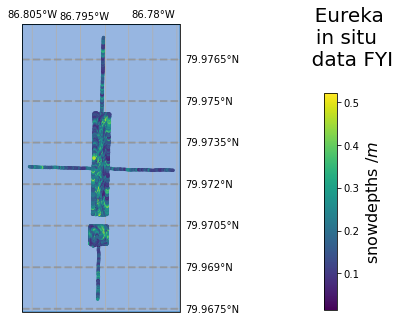

In [4]:
fig = plt.figure()

central_lon,central_lat = np.mean(Longitude),np.mean(Latitude)
ax = fig.add_axes([0,0,0.77,1], projection=ccrs.Orthographic(central_lon,central_lat))
scat = ax.scatter(Longitude,Latitude,s=5,c=DepthCm,transform=ccrs.PlateCarree(), zorder=3)
ax.gridlines()
cbar_ax = fig.add_axes([0.90, 0.007, 0.03, 0.753]) #start xpos, start ypos, #xwidth, ylendth
cbar_ax.set_title("       Eureka \n     in situ\n       data "+str(icetype).upper()+"\n",fontsize=20)
lol = cbar_ax.scatter(x=np.zeros(len(DepthCm)),y=np.zeros(len(DepthCm)),c=DepthCm/100)
cb = fig.colorbar(lol, cax=cbar_ax)
cb.set_label('snowdepths $/m$', size=16)

ax.coastlines(resolution='50m')
ocean110 = cartopy.feature.NaturalEarthFeature('physical', 'ocean', \
    scale='50m', edgecolor='none', facecolor=cartopy.feature.COLORS['water'])
ax.add_feature(ocean110)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.bottom_labels = False
gl.top_labels = True
gl.left_labels = False
gl.xlines = False

xlims = ax.get_xlim()
ylims = ax.get_ylim()

extent_lonlat = ax.get_extent(crs=ccrs.PlateCarree())

dataExtentPolygon = Polygon([(extent_lonlat[0],extent_lonlat[2]),\
                             (extent_lonlat[1],extent_lonlat[2]),\
                             (extent_lonlat[1],extent_lonlat[3]),\
                             (extent_lonlat[0],extent_lonlat[3])])
ax.plot(*dataExtentPolygon.exterior.xy,transform=ccrs.PlateCarree())

ax.set_extent(extent_lonlat,crs=ccrs.PlateCarree())
plt.show()

In [5]:
if icetype=='fyi':
    coincident_ku_files = ['IRKUB1B_20160419_04_004_deconv.nc', 'IRKUB1B_20160419_04_032_deconv.nc', 'IRKUB1B_20160419_04_050_deconv.nc', 'IRKUB1B_20160419_04_080_deconv.nc', 'IRKUB1B_20160419_04_180_deconv.nc', 'IRKUB1B_20160419_04_208_deconv.nc', 'IRKUB1B_20160419_04_230_deconv.nc', 'IRKUB1B_20160419_04_258_deconv.nc', 'IRKUB1B_20160419_04_259_deconv.nc']
elif icetype=='myi':
    coincident_ku_files = ['IRKUB1B_20160419_04_035_deconv.nc', 'IRKUB1B_20160419_04_047_deconv.nc', 'IRKUB1B_20160419_04_083_deconv.nc', 'IRKUB1B_20160419_04_176_deconv.nc', 'IRKUB1B_20160419_04_211_deconv.nc', 'IRKUB1B_20160419_04_226_deconv.nc', 'IRKUB1B_20160419_04_262_deconv.nc']

In [6]:
"""Making an overlapping KDTree of all the atm data from all of the flyovers"""
all_overlapping_h5_files = []
for ku_file in coincident_ku_files:
    for coinc in coincidence_arr:
        for sub_arr in coinc:
            if ku_file in sub_arr:
                #finding the kdtree that corresponds to the atm laser data file that coincides with ku_file:
                all_overlapping_h5_files.append(coinc[0])
                ku_files = coinc[1]
                
all_overlapping_h5_files = list(dict.fromkeys(all_overlapping_h5_files))
atm_laser = projectedLaser(all_overlapping_h5_files, "ease")
x_atm_laser,y_atm_laser = atm_laser.east, atm_laser.north

overlapping_kdtree = spatial.cKDTree(np.column_stack((x_atm_laser, y_atm_laser)))

In [7]:
"""using the ATM laser file offsets to align each ATM laser file to each other (each ATM file has an altimetric offset relative to the others
 determined by its mean patch offset, relative to the overall mean patch elevation of the ATM laser files combined).
 These offsets are calculated in Eureka_ATM_laser_Offsets.ipynb"""
if icetype == 'fyi':
    #this is  mean_atm_elev_each_flyover - np.mean(mean_atm_elev_each_flyover)
    atm_elev_flyover_offsets = [-0.00142218, -0.00882589, -0.0182781, -0.01468046, -0.06314833, 0.0375774, 0.02246962, 0.02315396, 0.02315396] #for first year ice!!!!
elif icetype == 'myi':
    atm_elev_flyover_offsets = [-0.01541401, -0.02724434, -0.00367711, -0.05813091, 0.03078281, 0.03742214, 0.03626142]
all_overlapping_atm_alts_arr = np.array([],dtype='double')
for i,ku_file in enumerate(coincident_ku_files):
    h5_files = []
    for coinc in coincidence_arr:
        for sub_arr in coinc:
            if ku_file in sub_arr:
                #finding the kdtree that corresponds to the atm laser data file that coincides with ku_file:
                h5_files.append(coinc[0])
                ku_files = coinc[1]
    atm = projectedLaser(h5_files, "ease")
    all_overlapping_atm_alts_arr = np.append(all_overlapping_atm_alts_arr, atm.alt - atm_elev_flyover_offsets[i])
    
#overriding the atm altitudes to compensate for the offsets between the atm files:
atm_laser.alt = all_overlapping_atm_alts_arr

In [8]:
offset_list_2D = []
angle_thresh=3

for ku_file_counter, ku_file in enumerate(coincident_ku_files):
    offset_list_file = []
    x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu(ku_file, coord_sys="ease")
    ku_subpath = "ku/"
    try:
        nc = netCDF4.Dataset(ku_file) #making an nc file in the format that Python can understand
    except FileNotFoundError:
        try:
            nc = netCDF4.Dataset(ku_subpath+ku_file)
        except FileNotFoundError:
            nc = netCDF4.Dataset(ku_path+ku_file)
    log_amplitude = nc['amplitude'][appropriate_indices] #a 2-D array of stacked waveforms, with the first index being waveform number 
                                    #and the second being the range bin number of a particular waveform. 
                                  #Contains log-amplitude waveform data
                                    #Shape = [number of waveforms x number of range bins in each waveform]
    fasttime_ku = nc['fasttime'][:]
    j=-1
    for footprint, footprint_data in footprintDataYielder(x_ku, y_ku, alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, atm_laser.coords, overlapping_kdtree):
        j+=1
        #the altitudes of the ATM data within a particular ku footprint:
        atm_alts_within = [atm_laser.alt[datum] for datum in footprint_data]
        #the rolls of the ATM data within a particular ku footprint:
        atm_rolls_within = [atm_laser.roll[datum] for datum in footprint_data]
        atm_pitches_within = [atm_laser.pitch[datum] for datum in footprint_data]
        if len(atm_alts_within)>0 and \
        abs(roll_ku[j]*180/np.pi)<angle_thresh and \
        abs(pitch_ku[j]*180/np.pi)<angle_thresh and \
        all(abs(atm_roll*180/np.pi)<angle_thresh for atm_roll in atm_rolls_within) and \
        all(abs(atm_pitch*180/np.pi)<angle_thresh for atm_pitch in atm_pitches_within):
            unlog_amp = 10**(np.array(log_amplitude[j])/10)
            try:
                offset_list_file.append(np.nanmean(atm_alts_within) - Waveform(unlog_amp,fasttime_ku,footprint_atm_alts = atm_alts_within,aircraft_alt=aircraft_alt_ku[j]).estimated_air_snow_alt)
            except:
                print(Waveform(unlog_amp,fasttime_ku,footprint_atm_alts = atm_alts_within,aircraft_alt=aircraft_alt_ku[j]).estimated_air_snow_alt)
                offset_list_file.append(np.nanmean(atm_alts_within) - Waveform(unlog_amp,fasttime_ku,footprint_atm_alts = atm_alts_within,aircraft_alt=aircraft_alt_ku[j]).estimated_air_snow_alt)
                raise

    offset_list_2D.append(offset_list_file)

[ 0.09616248  0.07145191  0.05828274  0.01450113 -0.04183004 -0.02992244
 -0.00074517 -0.03512533 -0.03456479]
[0.05746733 0.06804965 0.06556756 0.06409278 0.05090897 0.05719533
 0.05332833 0.05229018 0.06637376]
[483. 381. 451. 453. 477. 447. 496. 504. 410.]


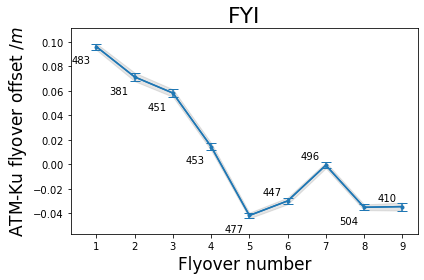

In [9]:
atm_ku_flyover_offset_means = np.full(len(offset_list_2D),np.nan, dtype='double')
atm_ku_flyover_offset_lens = np.full(len(offset_list_2D),np.nan, dtype= 'double')
atm_ku_flyover_offset_stds = np.full(len(offset_list_2D),np.nan, dtype='double')
atm_ku_flyover_offset_stes = np.full(len(offset_list_2D),np.nan, dtype='double')
for i, file_offsets in enumerate(offset_list_2D):
#     if i==1:
#         pass
#         p(len(np.array(file_offsets)[~np.isnan(file_offsets)]))
    atm_ku_flyover_offset_means[i] = np.nanmean(file_offsets)
    atm_ku_flyover_offset_stds[i] = np.nanstd(file_offsets, ddof=1)
    atm_ku_flyover_offset_stes[i] = np.nanstd(file_offsets, ddof=1)/np.sqrt(len(np.array(file_offsets)[~np.isnan(file_offsets)]))
    atm_ku_flyover_offset_lens[i] = len(np.array(file_offsets)[~np.isnan(file_offsets)])
#         print(np.nanmax(file_offsets))

print(atm_ku_flyover_offset_means)
print(atm_ku_flyover_offset_stds)
print(atm_ku_flyover_offset_lens)
errorPlot(range(1,len(atm_ku_flyover_offset_means)+1),atm_ku_flyover_offset_means, atm_ku_flyover_offset_stes, point_labels=atm_ku_flyover_offset_lens)
plt.xticks(range(1,len(atm_ku_flyover_offset_means)+1))
plt.ylabel("ATM-Ku flyover offset $/m$",fontsize=17)
plt.xlabel("Flyover number",fontsize=17)
plt.title(icetype.upper(), fontsize=22)
plt.tight_layout()
if saving:
    pass
    plt.savefig("plots/ATMKuFlyoverOffsets"+str(icetype).upper()+".png", dpi=200)

#uncomment this line if you want a global offset instead of a file-by-file offset:
# atm_ku_flyover_offset_means[:] = np.nanmean(fflat(offset_list_2D))

In [10]:
angle_thresh=3
waveform_arr = []
y_linregresses = []
x_linregresses = []
across_track_linregresses = []
across_track_linregresses_10m = []
airsnow_stds = np.array([],dtype='double')
across_tr_effective_max_angles = np.array([],dtype='double')
lin_regress_angles = np.array([],dtype='double')
lin_regress_angles_10m = np.array([],dtype='double')
linreg_roll_angles = np.array([],dtype='double')


snowice_interp_unlog_amps_high_sloped = np.array([],dtype='double')
airsnow_interp_unlog_amps_high_sloped = np.array([],dtype='double')
interp_amps_high_sloped_corre_coefs = np.array([],dtype='double')
snowice_interp_unlog_amps_low_sloped = np.array([],dtype='double')
airsnow_interp_unlog_amps_low_sloped = np.array([],dtype='double')
interp_amps_low_sloped_corre_coefs = np.array([],dtype='double')

closest_peak_amps_to_airsnow_interp_range_bin_high_sloped = np.array([],dtype='double')
closest_peak_amps_to_snowice_interp_range_bin_high_sloped = np.array([],dtype='double')
closest_peak_amps_high_sloped_corre_coefs = np.array([],dtype='double')
closest_peak_amps_to_airsnow_interp_range_bin_low_sloped = np.array([],dtype='double')
closest_peak_amps_to_snowice_interp_range_bin_low_sloped = np.array([],dtype='double')
closest_peak_amps_low_sloped_corre_coefs = np.array([],dtype='double')

for ku_file_counter, ku_file in enumerate(coincident_ku_files):

    x_ku,y_ku,alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, appropriate_indices = correctEastNorthKu(ku_file, coord_sys="ease")
    ku_subpath = "ku/"
    try:
        nc = netCDF4.Dataset(ku_file) #making an nc file in the format that Python can understand
    except FileNotFoundError:
        try:
            nc = netCDF4.Dataset(ku_subpath+ku_file)
        except FileNotFoundError:
            nc = netCDF4.Dataset(ku_path+ku_file)
    log_amplitude = nc['amplitude'][appropriate_indices] #a 2-D array of stacked waveforms, with the first index being waveform number 
                                    #and the second being the range bin number of a particular waveform. 
                                  #Contains log-amplitude waveform data
                                    #Shape = [number of waveforms x number of range bins in each waveform]
    fasttime_ku = nc['fasttime'][:]
    j=-1
    for footprint_poly, footprint_data in footprintDataYielder(x_ku, y_ku, alt_ku, pitch_ku, roll_ku, aircraft_alt_ku, azi_angle, atm_laser.coords, overlapping_kdtree):
        j+=1
        #the altitudes of the ATM data within a particular ku footprint:
        atm_alts_within = [atm_laser.alt[datum] for datum in footprint_data]
        #the rolls of the ATM data within a particular ku footprint:
        atm_rolls_within = [atm_laser.roll[datum] for datum in footprint_data]
        atm_pitches_within = [atm_laser.pitch[datum] for datum in footprint_data]
        if len(atm_alts_within)>0 and \
        abs(roll_ku[j]*180/np.pi)<angle_thresh and \
        abs(pitch_ku[j]*180/np.pi)<angle_thresh and \
        all(abs(atm_roll*180/np.pi)<angle_thresh for atm_roll in atm_rolls_within) and \
        all(abs(atm_pitch*180/np.pi)<angle_thresh for atm_pitch in atm_pitches_within):
            
            atm_estimated_airsnow_interface_xs = np.array([],dtype='double')
            atm_estimated_airsnow_interface_ys = np.array([],dtype='double')
            atm_estimated_airsnow_cross_track_projs = np.array([],dtype='double')
            atm_estimated_airsnow_cross_track_projs_10m = np.array([],dtype='double')
            indices_of_atm_points_within_5m_of_footprint_centre = overlapping_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=5)
            indices_of_atm_points_within_10m_of_footprint_centre = overlapping_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=10)

            """trying to find if multiple ATM laser points within a 10m radius circle have really closeby in situ data (within 10cm)"""    

            atm_estimated_airsnow_interface_alts = np.array([],dtype='double')
            #looping over the in situ and atm laser points that are within 10m of a particular ku SAR footprint centre::
            if len(indices_of_atm_points_within_5m_of_footprint_centre)>10:

                for atm_index in indices_of_atm_points_within_5m_of_footprint_centre:

                    atm_estimated_airsnow_interface_alts = np.append(atm_estimated_airsnow_interface_alts, \
                                                                                atm_laser.alt[atm_index])
                    atm_estimated_airsnow_interface_xs = np.append(atm_estimated_airsnow_interface_xs, x_atm_laser[atm_index])
                    atm_estimated_airsnow_interface_ys = np.append(atm_estimated_airsnow_interface_ys, y_atm_laser[atm_index])
                    theta_of_atm = atan2(x_atm_laser[atm_index]-x_ku[j], y_atm_laser[atm_index]-y_ku[j])
                    atm_dist_from_centre = np.sqrt((x_atm_laser[atm_index]-x_ku[j])**2.0 + (y_atm_laser[atm_index]-y_ku[j])**2.0)
                    atm_estimated_airsnow_cross_track_projs = np.append(atm_estimated_airsnow_cross_track_projs, \
                                                                                       atm_dist_from_centre*np.sin(theta_of_atm - azi_angle[j])) 
                across_track_linregress = linregress(atm_estimated_airsnow_cross_track_projs,atm_estimated_airsnow_interface_alts)
                across_track_linregresses.append(across_track_linregress)
                    
                    
                atm_estimated_airsnow_interface_alts_10m = np.array([],dtype='double')
                for atm_index in indices_of_atm_points_within_10m_of_footprint_centre:
                    atm_estimated_airsnow_interface_alts_10m = np.append(atm_estimated_airsnow_interface_alts_10m, \
                                                                                atm_laser.alt[atm_index])
                    theta_of_atm = atan2(x_atm_laser[atm_index]-x_ku[j], y_atm_laser[atm_index]-y_ku[j])
                    atm_dist_from_centre = np.sqrt((x_atm_laser[atm_index]-x_ku[j])**2.0 + (y_atm_laser[atm_index]-y_ku[j])**2.0)
                    atm_estimated_airsnow_cross_track_projs_10m = np.append(atm_estimated_airsnow_cross_track_projs_10m, \
                                                                                       atm_dist_from_centre*np.sin(theta_of_atm - azi_angle[j])) 
                    

                
                across_track_linregress_10m = linregress(atm_estimated_airsnow_cross_track_projs_10m,atm_estimated_airsnow_interface_alts_10m)
                across_track_linregresses_10m.append(across_track_linregress_10m)

                    
                airsnow_stds = np.append(airsnow_stds, np.std(atm_estimated_airsnow_interface_alts_10m,ddof = 1))
                H = (aircraft_alt_ku[j] - alt_ku[j])
                #pulse-limited across track dimension (pp. 12/17 of Ku SAR doc):
                across_tr_dim = 2*np.sqrt(299792458*1.5*H/(3.5*10**9))
                across_tr_effective_max_angles = np.append(across_tr_effective_max_angles,  atan(across_tr_dim/2/H))
                lin_regress_angles = np.append(lin_regress_angles, atan(across_track_linregress.slope))
                lin_regress_angles_10m = np.append(lin_regress_angles_10m, atan(across_track_linregress_10m.slope))
                linreg_roll_angles = np.append(linreg_roll_angles, roll_ku[j])
                
                """section of code that I'm using from Eureka_Powers so that I can extract the airsnow:snowice power ratios for high and low sloped footprints:"""
                """(the code still works fine if you cut out this section)"""
                indices_of_insitu_points_within_5m_of_footprint_centre = insitu_kdtree.query_ball_point([x_ku[j], y_ku[j]], r=5)
                footprint_insitu_snowdepths = np.array([],dtype='double') 
                for i in indices_of_insitu_points_within_5m_of_footprint_centre:
                    if footprint_poly.contains(Point(insitu_xs[i],insitu_ys[i])):
                        footprint_insitu_snowdepths = np.append(footprint_insitu_snowdepths,DepthCm[i]/100)
                if np.any(footprint_insitu_snowdepths):
                    atm_derived_alt_of_airsnow_interface = np.mean(atm_alts_within)
                    atm_insitu_derived_alt_of_snowice_interface = np.mean(atm_alts_within) - np.mean(footprint_insitu_snowdepths)

                    #converting the altitudes of the atm-insitu derived air-snow and snow-ice interfaces into interpolated range bin numbers
                    #(so that I can estimate the amplitudes of the air-snow and snow-ice interfaces)::::
                    arr_of_ku_alts_from_fasttimes = aircraft_alt_ku[j] + atm_ku_flyover_offset_means[ku_file_counter] - (np.array(fasttime_ku)*10**-6/2) * 299792458
                    #np.interp assumes monotonically increasing, whereas we want monotonically decreasing in altitude (corresponding to increasing range bins) 
                    #so we need to do some subsequent rearranging:::
                    arr_of_ku_alts_from_fasttimes_flipped = np.flip(arr_of_ku_alts_from_fasttimes)
                    airsnow_interp_range_bin, snowice_interp_range_bin = np.interp([atm_derived_alt_of_airsnow_interface,atm_insitu_derived_alt_of_snowice_interface],\
                                                                                   arr_of_ku_alts_from_fasttimes_flipped, np.arange(len(fasttime_ku)-1,-1,-1))
                    unlog_amp = 10**(np.array(log_amplitude[j])/10)


                    preliminary_start_of_signal  = [i for i,v in enumerate(unlog_amp) if v > np.mean(unlog_amp[:250])+6*np.std(unlog_amp[:250], ddof=1)][10]
                    i = preliminary_start_of_signal
                    while unlog_amp[i]>np.mean(unlog_amp[:250])+2.5*np.std(unlog_amp[:250], ddof=1):
                        i-=1
                    start_of_signal=i
                    #finding all the indices of all the peaks in the echo:
                    peak_indices, peak_dict = find_peaks(unlog_amp/simps(unlog_amp[start_of_signal:start_of_signal+250]), height=0.002)
                    closest_peak_index_to_airsnow_interp_range_bin = peak_indices[np.argmin(abs(peak_indices - airsnow_interp_range_bin))]
                    closest_peak_index_to_snowice_interp_range_bin = peak_indices[np.argmin(abs(peak_indices - snowice_interp_range_bin))]


                    airsnow_interp_unlog_amp, snowice_interp_unlog_amp = np.interp([airsnow_interp_range_bin, snowice_interp_range_bin], range(len(fasttime_ku)), unlog_amp)

                    """seeing if the footprint slopes are high (>1.3 deg) or low (<0.3 deg):"""
                    if abs(180/np.pi*atan(across_track_linregress.slope))>1.0: #if the slope angle is greater than 1.3 degrees:
                        airsnow_interp_unlog_amps_high_sloped = np.append(airsnow_interp_unlog_amps_high_sloped, airsnow_interp_unlog_amp)
                        snowice_interp_unlog_amps_high_sloped = np.append(snowice_interp_unlog_amps_high_sloped, snowice_interp_unlog_amp)
                        interp_amps_high_sloped_corre_coefs = np.append(interp_amps_high_sloped_corre_coefs, across_track_linregress.rvalue)
                        
                        if closest_peak_index_to_airsnow_interp_range_bin!=closest_peak_index_to_snowice_interp_range_bin:
                            closest_peak_amps_to_airsnow_interp_range_bin_high_sloped = np.append(closest_peak_amps_to_airsnow_interp_range_bin_high_sloped, \
                                                                                      unlog_amp[closest_peak_index_to_airsnow_interp_range_bin])
                            closest_peak_amps_to_snowice_interp_range_bin_high_sloped = np.append(closest_peak_amps_to_snowice_interp_range_bin_high_sloped, \
                                                                                      unlog_amp[closest_peak_index_to_snowice_interp_range_bin])
                            closest_peak_amps_high_sloped_corre_coefs = np.append(closest_peak_amps_high_sloped_corre_coefs, across_track_linregress.rvalue)
                            
                    elif abs(180/np.pi*atan(across_track_linregress.slope))<0.4: #if the slope angle is less than 0.3 degrees:
                        airsnow_interp_unlog_amps_low_sloped = np.append(airsnow_interp_unlog_amps_low_sloped, airsnow_interp_unlog_amp)
                        snowice_interp_unlog_amps_low_sloped = np.append(snowice_interp_unlog_amps_low_sloped, snowice_interp_unlog_amp)
                        interp_amps_low_sloped_corre_coefs = np.append(interp_amps_low_sloped_corre_coefs, across_track_linregress.rvalue)
                    
                        if closest_peak_index_to_airsnow_interp_range_bin!=closest_peak_index_to_snowice_interp_range_bin:
                            closest_peak_amps_to_airsnow_interp_range_bin_low_sloped = np.append(closest_peak_amps_to_airsnow_interp_range_bin_low_sloped, \
                                                                                      unlog_amp[closest_peak_index_to_airsnow_interp_range_bin])
                            closest_peak_amps_to_snowice_interp_range_bin_low_sloped = np.append(closest_peak_amps_to_snowice_interp_range_bin_low_sloped, \
                                                                                      unlog_amp[closest_peak_index_to_snowice_interp_range_bin])
                            closest_peak_amps_low_sloped_corre_coefs = np.append(closest_peak_amps_low_sloped_corre_coefs, across_track_linregress.rvalue)
                    
                    
                    

   
                            

In [11]:
print(np.mean(airsnow_stds))
print(len(airsnow_stds))

0.077081379019622
8313


#1f77b4


(-3.0, 3.0)

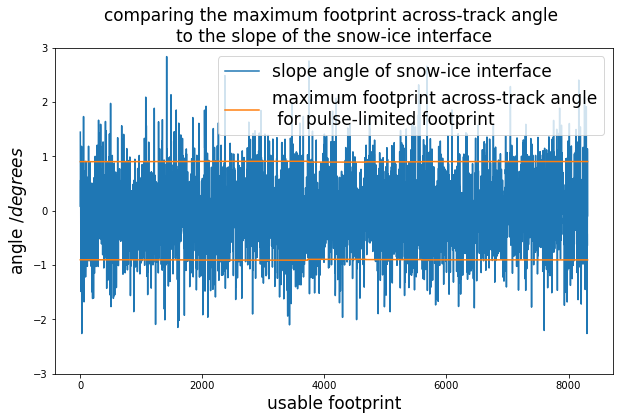

In [12]:
# plt.plot(linreg_roll_angles)
fig = plt.figure(figsize=(10,6))
a = plt.plot(180/np.pi*lin_regress_angles, label = 'slope angle of snow-ice interface')
print(a[0].get_color())
b = plt.plot(180/np.pi*across_tr_effective_max_angles , color='#ff7f0e')
plt.title("comparing the maximum footprint across-track angle \nto the slope of the snow-ice interface", fontsize=17)
plt.ylabel("angle $/degrees$", fontsize=17)
plt.plot(180/np.pi*-across_tr_effective_max_angles, label = 'maximum footprint across-track angle\n for pulse-limited footprint', color='#ff7f0e')
plt.xlabel("usable footprint", fontsize=17)
plt.legend(loc='best',prop={'size': 17})
if saving:
    pass
    plt.savefig("../Thesis/graphics/SlopesOfAirSnowInterfaceFootprints"+str(icetype).upper()+".png",dpi=200)
plt.ylim(-3,3)

In [13]:
print(np.mean(abs(180/np.pi*lin_regress_angles)))

0.44490247847893766


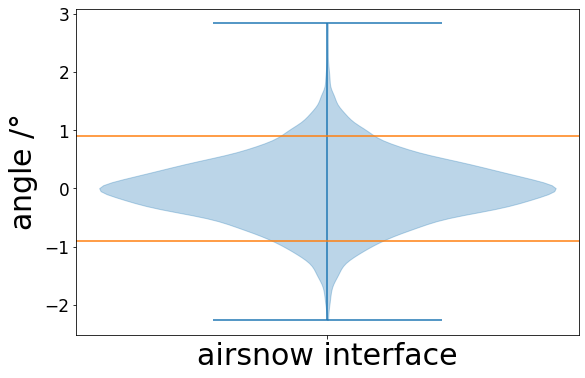

In [14]:
fig = plt.figure(figsize=(9,6))
a = plt.violinplot(180/np.pi*lin_regress_angles)
a['bodies'][0].set_color(c='#1f77b4')
plt.hist([1, 2], [np.nan, np.nan], color = '#1f77b4',alpha = 0.37, label = 'across-track slope angle\nof air-snow interface\nfor pulse-limited footprint')
plt.axhline(y=180/np.pi*across_tr_effective_max_angles[0],  color='#ff7f0e')
plt.axhline(y=-180/np.pi*across_tr_effective_max_angles[0], color='#ff7f0e', label = 'maximum projected\nacross-track footprint angle\nfor pulse-limited footprint')
plt.xticks(ticks = np.arange(1,2,1), labels = ['airsnow interface'], fontsize = 30)
plt.yticks(fontsize=17)
plt.ylabel("angle $/\degree$", fontsize=30)
# plt.legend(loc='best', prop={'size':15})
if saving:
    pass
    plt.savefig("../Thesis/graphics/SlopesOfAirSnowInterface"+str(icetype).upper()+".png",dpi=200)
plt.show()

/Users/claudederijkethomas/anaconda3/envs/icyenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


1.3990728960522845
2.8006738360730443
2.0018069422798543
0.3796304209434256
0.9549562441744309
2.515489253472506


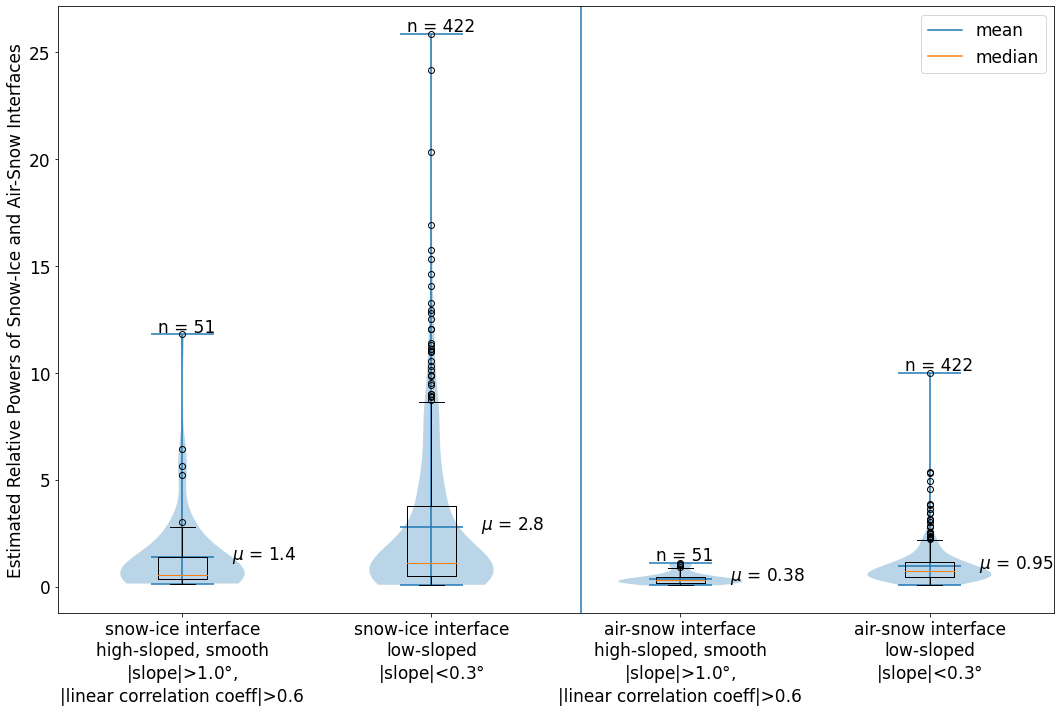

In [15]:
fig = plt.figure(figsize = (15,10))

plt.violinplot([snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7, snowice_interp_unlog_amps_low_sloped/0.7,\
               airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7, airsnow_interp_unlog_amps_low_sloped/0.7], showmeans = True)
plt.boxplot([snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7, snowice_interp_unlog_amps_low_sloped/0.7, \
            airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7, airsnow_interp_unlog_amps_low_sloped/0.7], widths=0.2)
snowice_high_sloped_mean = np.mean(snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7)
print(snowice_high_sloped_mean)
snowice_low_sloped_mean  = np.mean(snowice_interp_unlog_amps_low_sloped/0.7)
print(snowice_low_sloped_mean)
print(snowice_low_sloped_mean/snowice_high_sloped_mean)
airsnow_high_sloped_mean = np.mean(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7)
print(airsnow_high_sloped_mean)
airsnow_low_sloped_mean = np.mean(airsnow_interp_unlog_amps_low_sloped/0.7)
print(airsnow_low_sloped_mean)
print(airsnow_low_sloped_mean/airsnow_high_sloped_mean)
plt.xticks(ticks = np.arange(1,5,1), labels = ['snow-ice interface\nhigh-sloped, smooth\n|slope|>1.0$\degree$,\n|linear correlation coeff|>0.6','snow-ice interface\nlow-sloped\n|slope|<0.3$\degree$',\
                                              'air-snow interface\nhigh-sloped, smooth\n|slope|>1.0$\degree$,\n|linear correlation coeff|>0.6','air-snow interface\nlow-sloped\n|slope|<0.3$\degree$'], fontsize = 17)
plt.yticks(fontsize=17)
plt.axvline(x=2.6)
plt.ylabel("Estimated Relative Powers of Snow-Ice and Air-Snow Interfaces",fontsize=17)
plt.plot([1, 2], [np.nan, np.nan], color = '#1f77b4', label = 'mean')
plt.plot([1, 2], [np.nan, np.nan], color = '#ff7f0e', label = 'median')
plt.legend(loc='best', prop = {'size':17})
violin_plots_maxs = [np.nanmax(snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), np.nanmax(snowice_interp_unlog_amps_low_sloped/0.7),\
               np.nanmax(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), np.nanmax(airsnow_interp_unlog_amps_low_sloped/0.7)]
violin_plots_means = [np.nanmean(snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), np.nanmean(snowice_interp_unlog_amps_low_sloped/0.7),\
               np.nanmean(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), np.nanmean(airsnow_interp_unlog_amps_low_sloped/0.7)]
point_labels = [len(snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), len(snowice_interp_unlog_amps_low_sloped/0.7),\
               len(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.6]/0.7), len(airsnow_interp_unlog_amps_low_sloped/0.7)]
for i, txt in enumerate(point_labels):
    plt.annotate("n = "+str(int(txt)), (i+1- 0.1,violin_plots_maxs[i]+0.12), fontsize=17)
for i, txt in enumerate(violin_plots_means):
    plt.annotate("$\mu$ = "+str(np.round(txt,2)), (i+1+0.2, violin_plots_means[i]-0.1), fontsize=17)
plt.tight_layout()
if saving:
    pass
    plt.savefig("../Thesis/graphics/HighAndLowSlopeInterfacePowers"+str(icetype).upper()+".png",dpi=200)

In [16]:
#airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5]/0.7
#snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5]/0.7
#snowice_interp_unlog_amps_low_sloped/0.7
#airsnow_interp_unlog_amps_low_sloped/0.7

snowice_is_bigger_high_sloped_counter = 0
airsnow_is_bigger_high_sloped_counter = 0
ratios_of_snowice_to_airsnow_high_sloped_amps = np.array([],dtype='double')

for i in range(len(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5]/0.7)):
    if snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i]>airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i]:
        snowice_is_bigger_high_sloped_counter+=1
    elif airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i]>snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i]:
        airsnow_is_bigger_high_sloped_counter+=1
    ratios_of_snowice_to_airsnow_high_sloped_amps = np.append(ratios_of_snowice_to_airsnow_high_sloped_amps, snowice_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i]/airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5][i])
print(np.mean(ratios_of_snowice_to_airsnow_high_sloped_amps))
print(airsnow_is_bigger_high_sloped_counter/len(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5]))
print(len(airsnow_interp_unlog_amps_high_sloped[abs(interp_amps_high_sloped_corre_coefs)>0.5]))
print(airsnow_is_bigger_high_sloped_counter)
    

4.773134433722973
0.18666666666666668
75
14


In [17]:
snowice_is_bigger_low_sloped_counter = 0
airsnow_is_bigger_low_sloped_counter = 0
ratios_of_snowice_to_airsnow_low_sloped_amps = np.array([],dtype='double')

for i in range(len(airsnow_interp_unlog_amps_low_sloped)):
    if snowice_interp_unlog_amps_low_sloped[i]>airsnow_interp_unlog_amps_low_sloped[i]:
        snowice_is_bigger_low_sloped_counter+=1
    elif airsnow_interp_unlog_amps_low_sloped[i]>snowice_interp_unlog_amps_low_sloped[i]:
        airsnow_is_bigger_low_sloped_counter+=1
    ratios_of_snowice_to_airsnow_low_sloped_amps = np.append(ratios_of_snowice_to_airsnow_low_sloped_amps, snowice_interp_unlog_amps_low_sloped[i]/airsnow_interp_unlog_amps_low_sloped[i])
print(np.mean(ratios_of_snowice_to_airsnow_low_sloped_amps))
print(airsnow_is_bigger_low_sloped_counter/len(airsnow_interp_unlog_amps_low_sloped))
print(len(airsnow_interp_unlog_amps_low_sloped))
print(airsnow_is_bigger_low_sloped_counter)

4.138144965617595
0.35545023696682465
422
150


/Users/claudederijkethomas/anaconda3/envs/icyenv/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


1.4389276967119815
2.6107833644918266


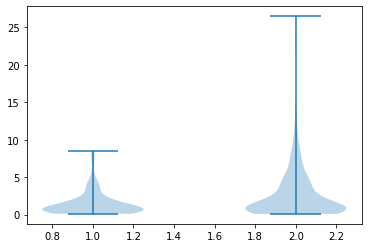

In [18]:

plt.violinplot([closest_peak_amps_to_snowice_interp_range_bin_high_sloped[abs(closest_peak_amps_high_sloped_corre_coefs)>0.5], closest_peak_amps_to_snowice_interp_range_bin_low_sloped])
print(np.mean(closest_peak_amps_to_snowice_interp_range_bin_high_sloped[abs(closest_peak_amps_high_sloped_corre_coefs)>0.5]))
print(np.mean(closest_peak_amps_to_snowice_interp_range_bin_low_sloped))


In [ ]:
plt.hist(closest_peak_amps_to_snowice_interp_range_bin_high_sloped[abs(closest_peak_amps_high_sloped_corre_coefs)>0.5], bins = np.linspace(0,12,50))
plt.hist(closest_peak_amps_to_snowice_interp_range_bin_low_sloped, bins = np.linspace(0,12,50), alpha=0.5)